## Load, Format and Inspect Data

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

In [2]:
# Use pandas to read CSV file
data = pd.read_csv('../data/germanHeaders.csv', header=None)

# Data file read with number header and index column
data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,account_status,duration,credit_history,purpose,credit_amount,savings_account,unemployed,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,credits,job,liable_for,telephone,foreign_worker,good/bad
1,0.0,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,1,A192,A201,1
2,1.0,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,2
3,2.0,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,1
4,3.0,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,995.0,A14,12,A32,A42,1736,A61,A74,3,A92,...,A121,31,A143,A152,1,A172,1,A191,A201,1
997,996.0,A11,30,A32,A41,3857,A61,A73,4,A91,...,A122,40,A143,A152,1,A174,1,A192,A201,1
998,997.0,A14,12,A32,A43,804,A61,A75,4,A93,...,A123,38,A143,A152,1,A173,1,A191,A201,1
999,998.0,A11,45,A32,A43,1845,A61,A73,4,A93,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [3]:
# Store column names
columns = data.iloc[0].tolist()
data.columns = columns

# Drop number headers and replace with descriptive headers
data = data.iloc[1:]

# Drop Nan column
data = data.iloc[:,1:]

In [4]:
# Remove any attribute data that contains "A"
data = data.replace({'A':''}, regex=True)

# Update outcome column where bad=0 and good=1
data['good/bad'] = data['good/bad'].replace({'2':'0'}, regex=True)

In [5]:
# Update all data types in dataframe from string to numeric
data = data.apply(pd.to_numeric) 

# Check data type of dataframe (now integer)
data.dtypes

account_status             int64
duration                   int64
credit_history             int64
purpose                    int64
credit_amount              int64
savings_account            int64
unemployed                 int64
installment_rate           int64
personal_status_sex        int64
debtors/guarantors         int64
present_residence_since    int64
property                   int64
age                        int64
other_installment_plans    int64
housing                    int64
credits                    int64
job                        int64
liable_for                 int64
telephone                  int64
foreign_worker             int64
good/bad                   int64
dtype: object

In [6]:
# Save new CSV with proper formatting (optional)
# data.to_csv('cleandata_woutcome.csv')

## Define X and y

In [7]:
# Define X and y

X = data.iloc[1:, :-1].values
y = data.iloc[1:, -1].values

# Print y values

print(sorted(Counter(y).items()))

[(0, 300), (1, 699)]


In [8]:
# Split into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scale Data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(X_train)

[[-0.49596658  0.02485567  1.36885619 ... -0.4215127   1.21660694
  -0.20069324]
 [ 1.10523588 -0.22901113  1.36885619 ... -0.4215127  -0.82195816
  -0.20069324]
 [ 1.10523588  0.27872247 -0.47516051 ... -0.4215127  -0.82195816
  -0.20069324]
 ...
 [-0.49596658 -0.99061153 -0.47516051 ... -0.4215127  -0.82195816
  -0.20069324]
 [-0.49596658 -1.24447834 -0.47516051 ... -0.4215127   1.21660694
  -0.20069324]
 [ 0.30463465 -0.90598927 -0.47516051 ... -0.4215127   1.21660694
  -0.20069324]]


In [10]:
print(X_test)

[[ 1.10523588  0.27872247 -0.47516051 ... -0.4215127  -0.82195816
  -0.20069324]
 [ 1.10523588 -0.48287793 -0.47516051 ...  2.37240776 -0.82195816
  -0.20069324]
 [ 1.10523588  0.27872247 -0.47516051 ... -0.4215127   1.21660694
  -0.20069324]
 ...
 [ 1.10523588 -0.73674473 -0.47516051 ... -0.4215127   1.21660694
  -0.20069324]
 [ 1.10523588  0.53258928  0.44684784 ... -0.4215127  -0.82195816
  -0.20069324]
 [ 1.10523588  0.02485567  0.44684784 ...  2.37240776 -0.82195816
  -0.20069324]]


## Training the Random Forest Classification Model on the Training Set


In [11]:
# Train model with 1000 decision tree classifiers

classifier = RandomForestClassifier(n_estimators=1000, criterion ='entropy', random_state=0, oob_score=True)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, oob_score=True,
                       random_state=0)

In [12]:
# Print predictions with the trained model on the testing set

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]

In [13]:
# Print the accuaracy score

cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.76


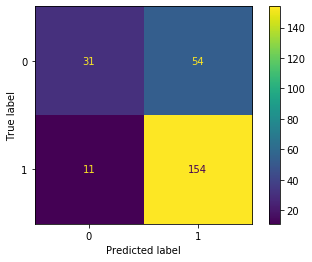

In [14]:
# Plot confusion matrix

clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [15]:
#Print the classification report

predictions = classifier.predict(X_test)
print (classification_report(y_test, predictions,
                            target_names=["bad","good"])) 

              precision    recall  f1-score   support

         bad       0.78      0.41      0.54        85
        good       0.76      0.94      0.84       165

    accuracy                           0.76       250
   macro avg       0.77      0.68      0.69       250
weighted avg       0.76      0.76      0.74       250



In [16]:
# Print the feaure importances

feature_names = data.columns
sorted(zip(classifier.feature_importances_, feature_names), reverse=True)

[(0.1329554390196528, 'credit_amount'),
 (0.10402773183853428, 'age'),
 (0.09959375908505316, 'account_status'),
 (0.09201120488942273, 'duration'),
 (0.06311795009935317, 'purpose'),
 (0.05861459874100078, 'credit_history'),
 (0.05543723508998922, 'unemployed'),
 (0.052199424383566236, 'savings_account'),
 (0.04810190304855255, 'property'),
 (0.0430917288590459, 'installment_rate'),
 (0.041792784330847425, 'present_residence_since'),
 (0.03513620039510599, 'personal_status_sex'),
 (0.03320018637315541, 'job'),
 (0.030837585354441824, 'other_installment_plans'),
 (0.028941626755665542, 'housing'),
 (0.022569893926630998, 'credits'),
 (0.020575645295445536, 'telephone'),
 (0.01747817624283548, 'debtors/guarantors'),
 (0.016208326315709187, 'liable_for'),
 (0.004108599955991853, 'foreign_worker')]

No handles with labels found to put in legend.


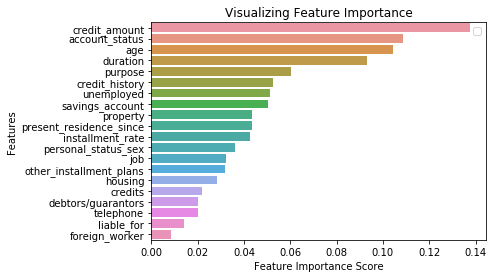

In [54]:
feature_imp = pd.Series(classifier.feature_importances_,index=data.columns[:-1]).sort_values(ascending=False)
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Feature Importance")
plt.legend()
plt.show()

## Try to improve the model by adding more samples, using more decision tree classifiers and dropping attributes, that should not impact risk

In [18]:
# Drop less significant attributes

data_dropped = data.drop(['foreign_worker', 'telephone', 'liable_for', 'personal_status_sex'], axis=1)

# Define X and y

X = data.iloc[1:, :-1].values
y = data.iloc[1:, -1].values

In [19]:
# Create more samples with the RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 699), (1, 699)]


In [20]:
#Split the resmpaled data

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=1)

# Scale the resampled data

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=1)

In [21]:
# Train model this time using 3000 decision tree classifiers

classifier = RandomForestClassifier(n_estimators=3000, criterion ='entropy', random_state=0, oob_score=True)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=3000, oob_score=True,
                       random_state=0)

In [44]:
# Print the new predictions with the trained model on the testing set

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [23]:
# Print the new accuaracy score

cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8714285714285714


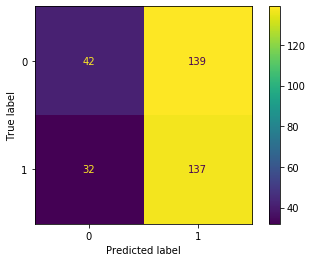

In [24]:
# Plot the new confusion matrix

clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [25]:
#Print the new classification report

predictions = classifier.predict(X_test)
print (classification_report(y_test, predictions,
                            target_names=["bad","good"])) 

              precision    recall  f1-score   support

         bad       0.85      0.91      0.88       181
        good       0.90      0.83      0.86       169

    accuracy                           0.87       350
   macro avg       0.87      0.87      0.87       350
weighted avg       0.87      0.87      0.87       350



In [48]:
scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.85714286 0.83809524 0.8952381  0.85714286 0.84761905 0.85714286
 0.83809524 0.87619048 0.89423077 0.86538462]
Mean: 0.8626282051282053
Standard Deviation: 0.01942404402868008


In [26]:
# Which model had the highest score?

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest'],
    'Score': [0.73, 0.75, 0.87]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.87,Random Forest
0.75,Logistic Regression
0.73,Support Vector Machines


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.83')

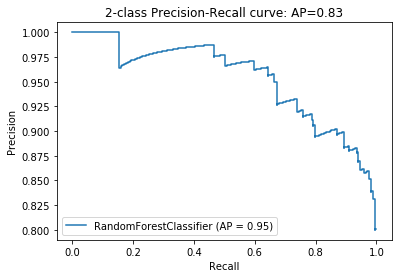

In [73]:
disp = plot_precision_recall_curve(classifier, X_test, y_test)
average_precision = average_precision_score(y_test, y_pred)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))